# Summary Statistics

## Imports

In [1]:
import pandas as pd

In [2]:
food_consumption = pd.read_csv('../data/food_consumption.csv')

## Measures of center

### Mean and median

In [4]:
# Import numpy with alias np
import numpy as np

# Filter for Belgium
be_consumption = food_consumption[food_consumption['country'] == 'Belgium'].copy()

# Filter for USA
usa_consumption = food_consumption[food_consumption['country'] == 'USA'].copy()

# Calculate mean and median consumption in Belgium
print(be_consumption['consumption'].mean())
print(be_consumption['consumption'].median())

# Calculate mean and median consumption in USA
print(usa_consumption['consumption'].mean())
print(usa_consumption['consumption'].median())

42.13272727272727
12.59
44.650000000000006
14.58


In [5]:
# Import numpy as np
import numpy as np

# Subset for Belgium and USA only
be_and_usa = food_consumption[(food_consumption['country'] == 'Belgium') | (food_consumption['country'] == 'USA')]

# Group by country, select consumption column, and compute mean and median
print(be_and_usa.groupby('country')['consumption'].agg(['mean', 'median']))

              mean  median
country                   
Belgium  42.132727   12.59
USA      44.650000   14.58


### Mean vs. median

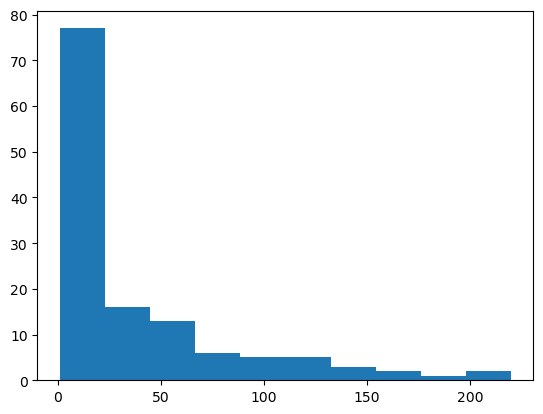

In [6]:
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Subset for food_category equals rice
rice_consumption = food_consumption[food_consumption['food_category'] == 'rice'].copy()

# Histogram of co2_emission for rice and show plot
plt.hist(rice_consumption['co2_emission'])
plt.show()

In [8]:
# Subset for food_category equals rice
rice_consumption = food_consumption[food_consumption['food_category'] == 'rice']

# Calculate mean and median of co2_emission with .agg()
print(rice_consumption['co2_emission'].agg(['mean', 'median']))

mean      37.591615
median    15.200000
Name: co2_emission, dtype: float64


## Measures of spread

### Quartiles, quantiles, and quintiles

In [11]:
# Calculate the quartiles of co2_emission
print(np.quantile(food_consumption['co2_emission'], [0, 0.25, 0.5, 0.75, 1]))

[   0.        5.21     16.53     62.5975 1712.    ]


In [12]:
# Calculate the quintiles of co2_emission
print(np.quantile(food_consumption['co2_emission'], [0, 0.2, 0.4, 0.6, 0.8, 1]))

[   0.       3.54    11.026   25.59    99.978 1712.   ]


In [16]:
# Calculate the deciles of co2_emission
print(np.quantile(food_consumption['co2_emission'], [i/10 for i in range(11)]))

[0.00000e+00 6.68000e-01 3.54000e+00 7.04000e+00 1.10260e+01 1.65300e+01
 2.55900e+01 4.42710e+01 9.99780e+01 2.03629e+02 1.71200e+03]


### Variance and standard deviation

                        var         std
food_category                          
beef           88748.408132  297.906710
dairy          17671.891985  132.935669
eggs              21.371819    4.622966
fish             921.637349   30.358481
lamb_goat      16475.518363  128.356996
nuts              35.639652    5.969895
pork            3094.963537   55.632396
poultry          245.026801   15.653332
rice            2281.376243   47.763754
soybeans           0.879882    0.938020
wheat             71.023937    8.427570


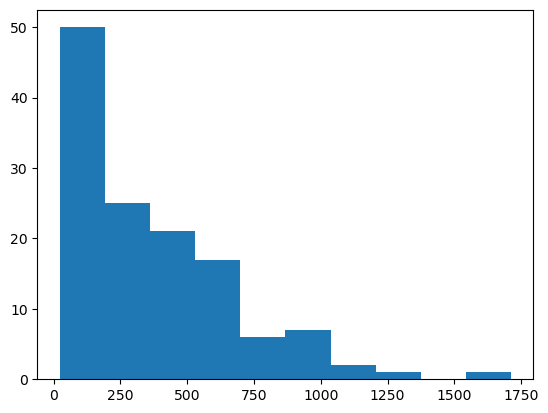

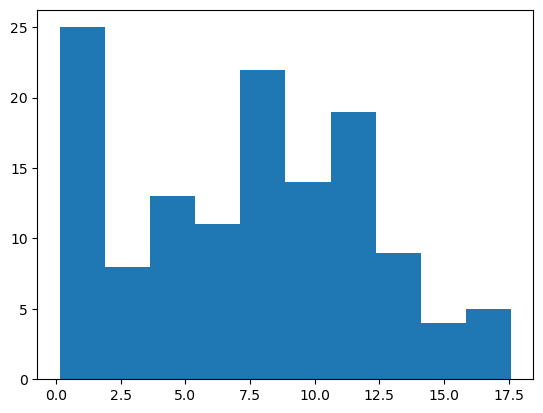

In [22]:
# Print variance and sd of co2_emission for each food_category
print(food_consumption.groupby('food_category')['co2_emission'].agg(['var', 'std']))

# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Create histogram of co2_emission for food_category 'beef'
plt.hist(food_consumption['co2_emission'][food_consumption['food_category'] == 'beef'])
# Show plot
plt.show()

# Create histogram of co2_emission for food_category 'eggs'
plt.hist(food_consumption['co2_emission'][food_consumption['food_category'] == 'eggs'])
# Show plot
plt.show()

### Finding outliers using IQR

In [24]:
# Calculate total co2_emission per country: emissions_by_country
emissions_by_country = food_consumption.groupby('country')['co2_emission'].sum()

print(emissions_by_country)

country
Albania      1777.85
Algeria       707.88
Angola        412.99
Argentina    2172.40
Armenia      1109.93
              ...   
Uruguay      1634.91
Venezuela    1104.10
Vietnam       641.51
Zambia        225.30
Zimbabwe      350.33
Name: co2_emission, Length: 130, dtype: float64


In [25]:
# Calculate total co2_emission per country: emissions_by_country
emissions_by_country = food_consumption.groupby('country')['co2_emission'].sum()

# Compute the first and third quartiles and IQR of emissions_by_country
q1 = np.quantile(emissions_by_country, 0.25)
q3 = np.quantile(emissions_by_country, 0.75)
iqr = q3 - q1

In [27]:
# Calculate total co2_emission per country: emissions_by_country
emissions_by_country = food_consumption.groupby('country')['co2_emission'].sum()

# Compute the first and third quantiles and IQR of emissions_by_country
q1 = np.quantile(emissions_by_country, 0.25)
q3 = np.quantile(emissions_by_country, 0.75)
iqr = q3 - q1

# Calculate the lower and upper cutoffs for outliers
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

In [28]:
# Calculate total co2_emission per country: emissions_by_country
emissions_by_country = food_consumption.groupby('country')['co2_emission'].sum()

# Compute the first and third quantiles and IQR of emissions_by_country
q1 = np.quantile(emissions_by_country, 0.25)
q3 = np.quantile(emissions_by_country, 0.75)
iqr = q3 - q1

# Calculate the lower and upper cutoffs for outliers
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

# Subset emissions_by_country to find outliers
outliers = emissions_by_country[(emissions_by_country < lower) | (emissions_by_country > upper)]
print(outliers)

country
Argentina    2172.4
Name: co2_emission, dtype: float64
